# Setup

In [74]:
# python >= 3.5 is required
import sys
assert sys.version_info >= (3,5)
# scikit learn >=0.20 is required
import sklearn
assert sklearn.__version__ >= '0.20'

# commmon imports
import numpy as np
import os

# to maake this notebook outpuut stable accross runs
np.random.seed(42)

# set up plot 
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes',labelsize=14)
mpl.rc('xtick',labelsize=12)
mpl.rc('ytick',labelsize=12)

# where to save the figure
ROOT = '.'
CHAPTER_ID = 'svm'
IMAGES_PATH = os.path.join(ROOT,'images',CHAPTER_ID)
os.makedirs(IMAGES_PATH,exist_ok=True)

def save_fig(fig_id,tight_layout=True, fig_extension='png',resolution=300):
    path = os.path.join(IMAGES_PATH,fig_id + '.' +fig_extension)
    print('saving images figure',fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path,format=fig_extension,dpi=resolution)



pada di svm disini the objcvtive adalah membuat selebar mungking decision boundraies dashed line (hyperlane) pada decision boundaries straight line yang disebut high margin decision yang mana di tentunkan sepenuhnya oleh support vector.

SVM sangat sensitive pada feature scaling 
- unscaled akan menyebabkan low margin yang mana pengclasifition tidak terlalu baik
- scaled akan menyebabkan high margin yang mana pengclassifition akan more batter 

# Hard Margin Classification

In [75]:
from sklearn.svm import SVC
from sklearn import datasets
iris= datasets.load_iris()
X = iris['data'][:,(2,3)] # petal lenght , petal width
y = iris['target']
setosa_or_versicolor = (y==0) | (y==1)
X = X[setosa_or_versicolor]
y = y[setosa_or_versicolor]
# svm classified the model
svm_clf = SVC(kernel='linear',C=float('inf'))# agar tidak negatif C inf
svm_clf.fit(X,y)
w=svm_clf.coef_[0]
b=svm_clf.intercept_[0]
x0 = np.linspace(0,5.5,200)
print(-w[0]/w[1] *x0 - b/w[1])

svs = svm_clf.support_vectors_
print('\nSupport vectors:\n',svs)

print('\nMargin:\n',1/w[1])

[ 4.60000004e+00  4.55656860e+00  4.51313716e+00  4.46970571e+00
  4.42627427e+00  4.38284283e+00  4.33941138e+00  4.29597994e+00
  4.25254850e+00  4.20911705e+00  4.16568561e+00  4.12225417e+00
  4.07882273e+00  4.03539128e+00  3.99195984e+00  3.94852840e+00
  3.90509695e+00  3.86166551e+00  3.81823407e+00  3.77480263e+00
  3.73137118e+00  3.68793974e+00  3.64450830e+00  3.60107685e+00
  3.55764541e+00  3.51421397e+00  3.47078252e+00  3.42735108e+00
  3.38391964e+00  3.34048820e+00  3.29705675e+00  3.25362531e+00
  3.21019387e+00  3.16676242e+00  3.12333098e+00  3.07989954e+00
  3.03646810e+00  2.99303665e+00  2.94960521e+00  2.90617377e+00
  2.86274232e+00  2.81931088e+00  2.77587944e+00  2.73244799e+00
  2.68901655e+00  2.64558511e+00  2.60215367e+00  2.55872222e+00
  2.51529078e+00  2.47185934e+00  2.42842789e+00  2.38499645e+00
  2.34156501e+00  2.29813357e+00  2.25470212e+00  2.21127068e+00
  2.16783924e+00  2.12440779e+00  2.08097635e+00  2.03754491e+00
  1.99411347e+00  1.95068

In [76]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

saving images figure large_margin_classification_plot


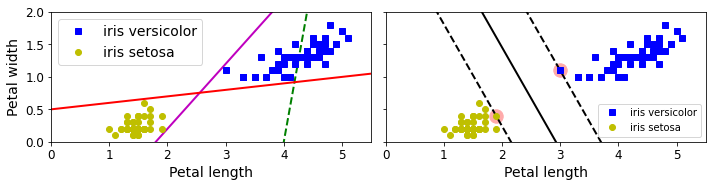

In [77]:
x0 = np.linspace(0,5.5,200) # 200 data
pred_1 = 5 * x0 - 20
pred_2 = x0 - 1.8
pred_3 = 0.1 * x0 + 0.5

def plot_svc_boundary(svm_clf,xmin,xmax):
    w = svm_clf.coef_[0]
    b = svm_clf.intercept_[0]
    
    # pada decision boundaries w0 *xo + w1 *x1 +b =0
    # => x1 = -w0/w1 *x0 - b/w1
    x0 = np.linspace(xmin,xmax,200)# take at 200
    decision_boundary = -w[0]/w[1] *x0 - b/w[1]
    
    margin = 1/w[1]
    gutter_up = decision_boundary + margin
    gutter_down = decision_boundary - margin
    
    svs = svm_clf.support_vectors_
    plt.scatter(svs[:,0],svs[:,1],s=180,facecolors='#FFAAAA')
    plt.plot(x0, decision_boundary,'k-',linewidth=2)
    plt.plot(x0, gutter_up, "k--", linewidth=2)
    plt.plot(x0, gutter_down, "k--", linewidth=2)
    
fig, axes = plt.subplots(ncols=2,figsize=(10,2.7),sharey=True)

plt.sca(axes[0])
plt.plot(x0, pred_1,'g--',linewidth=2)
plt.plot(x0, pred_2, 'm-',linewidth=2)
plt.plot(x0, pred_3, 'r-',linewidth=2)

plt.plot(X[:,0][y==1], X[:,1][y==1],'bs',label='iris versicolor')
plt.plot(X[:,0][y==0], X[:,1][y==0],'yo',label= 'iris setosa')

plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="upper left", fontsize=14)
plt.axis([0, 5.5, 0, 2])

plt.sca(axes[1])
plot_svc_boundary(svm_clf,0,5.5)
plt.plot(X[:,0][y==1],X[:,1][y==1],'bs',label='iris versicolor')
plt.plot(X[:,0][y==0],X[:,1][y==0],'yo',label='iris setosa')
plt.xlabel("Petal length", fontsize=14)
plt.axis([0, 5.5, 0, 2])

save_fig("large_margin_classification_plot")
plt.legend()
plt.show()
    

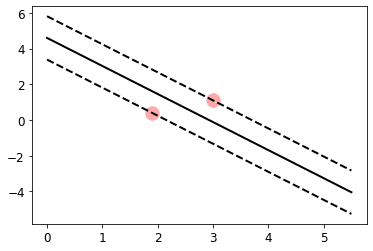

In [78]:
plt.scatter(svs[:,0],svs[:,1],s=180,facecolors='#FFAAAA')
decision_boundary = -w[0]/w[1] *x0 - b/w[1]    
margin = 1/w[1]
gutter_up = decision_boundary + margin
gutter_down = decision_boundary - margin
plt.plot(x0, decision_boundary,'k-',linewidth=2)
plt.plot(x0, gutter_up, "k--", linewidth=2)
plt.plot(x0, gutter_down, "k--", linewidth=2)

saving images figure sensitivity_to_feature_scales_plot


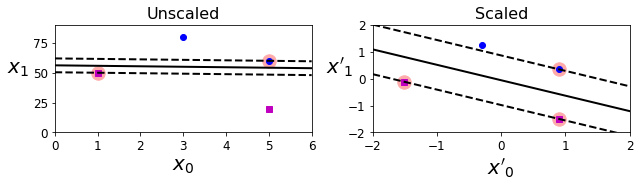

In [79]:
Xs = np.array([[1, 50], [5, 20], [3, 80], [5, 60]]).astype(np.float64)
ys = np.array([0, 0, 1, 1])
svm_clf = SVC(kernel="linear", C=100)
svm_clf.fit(Xs, ys)

plt.figure(figsize=(9,2.7))
plt.subplot(121)
plt.plot(Xs[:, 0][ys==1], Xs[:, 1][ys==1], "bo")
plt.plot(Xs[:, 0][ys==0], Xs[:, 1][ys==0], "ms")
plot_svc_boundary(svm_clf, 0, 6)
plt.xlabel("$x_0$", fontsize=20)
plt.ylabel("$x_1$    ", fontsize=20, rotation=0)
plt.title("Unscaled", fontsize=16)
plt.axis([0, 6, 0, 90])

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(Xs)
svm_clf.fit(X_scaled, ys)

plt.subplot(122)
plt.plot(X_scaled[:, 0][ys==1], X_scaled[:, 1][ys==1], "bo")
plt.plot(X_scaled[:, 0][ys==0], X_scaled[:, 1][ys==0], "ms")
plot_svc_boundary(svm_clf, -2, 2)
plt.xlabel("$x'_0$", fontsize=20)
plt.ylabel("$x'_1$  ", fontsize=20, rotation=0)
plt.title("Scaled", fontsize=16)
plt.axis([-2, 2, -2, 2])

save_fig("sensitivity_to_feature_scales_plot")

# Soft Margin Classification

detect the iris virginicia flower

In [80]:
X_outliers = np.array([[3.4, 1.3], [3.2, 0.8]])
y_outliers = np.array([0, 0])
# jadi di setiap data frame X atau y akan ada outlier yang di turunkan pada baris
X01 = np.concatenate([X,X_outliers[:1]],axis=0)
y01 = np.concatenate([y,y_outliers[:1]],axis=0)
X02 = np.concatenate([X,X_outliers[1:]],axis=0)
y02 = np.concatenate([y,y_outliers[1:]],axis=0)

soft_svm = SVC(kernel='linear',C=10**9)
soft_svm.fit(X02,y02)


SVC(C=1000000000, kernel='linear')

saving images figure sensitivity_to_outliers_plot


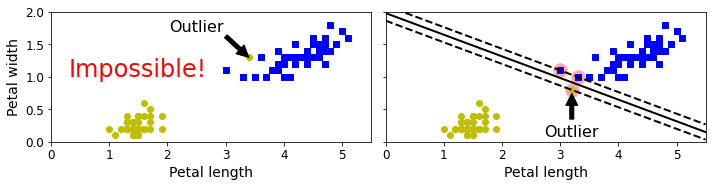

In [81]:
fig, axes = plt.subplots(ncols=2,figsize=(10,2.7),sharey=True)

plt.sca(axes[0])
plt.plot(X01[:,0][y01==1],X01[:,1][y01==1],'bs')
plt.plot(X01[:,0][y01==0],X01[:,1][y01==0],'yo')
plt.text(0.3, 1.0, "Impossible!", fontsize=24, color="red")
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)

plt.annotate("Outlier",
             xy=(X_outliers[0][0],X_outliers[0][1]),
             xytext=(2.5,1.7),
             ha="center",
             arrowprops=dict(facecolor='black'),
             fontsize=16,
             )
plt.axis([0, 5.5, 0, 2])


plt.sca(axes[1])
plt.plot(X02[:,0][y02==1],X02[:,1][y02==1],'bs')
plt.plot(X02[:,0][y02==0],X02[:,1][y02==0],'yo')

plot_svc_boundary(soft_svm,0,5.5)

plt.xlabel("Petal length", fontsize=14)
plt.annotate("Outlier",
             xy=(X_outliers[1][0], X_outliers[1][1]),
             xytext=(3.2, 0.08),
             ha="center",
             arrowprops=dict(facecolor='black', shrink=0.1),
             fontsize=16,
            )
plt.axis([0, 5.5, 0, 2])

save_fig("sensitivity_to_outliers_plot")
plt.show()


Dari yang kita lihat jika hard svm classifier akan tdk dapat digunakan jika data tidak linear spreate dan sensitive terhadap outlier maka dari itu dapat dilakukan soft svm classifier dengan meregulasi sebuah svm dengan hyperparameter C

In [82]:
import numpy as np 
from sklearn import datasets
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

iris = datasets.load_iris()
X = iris['data'][:,(2,3)]#petal length and petal width
y = (iris["target"]==2).astype(np.float64) # iris virginicia



In [83]:
svm_clf_soft = Pipeline([
    ("scaller",StandardScaler()),
    ("linear_svc",LinearSVC(C=1,loss='hinge',random_state=42))
])
svm_clf_soft.fit(X,y)

Pipeline(steps=[('scaller', StandardScaler()),
                ('linear_svc', LinearSVC(C=1, loss='hinge', random_state=42))])

In [84]:
print(X[:1])
print(y[:1])
svm_clf_soft.predict([[1.4, 0.2]])

[[1.4 0.2]]
[0.]


array([0.])

In [85]:
scaler = StandardScaler()
svm_clf_soft_1 = LinearSVC(C=1, loss='hinge',random_state=42)
svm_clf_soft_2 = LinearSVC(C=100, loss='hinge',random_state=42)

# scalled
scalled_svm_clf_soft_1 = Pipeline([
    ('scaler',scaler),
    ('linear',svm_clf_soft_1)
])

scalled_svm_clf_soft_2 = Pipeline([
    ('scaler',scaler),
    ('linear',svm_clf_soft_2)
])

scalled_svm_clf_soft_1.fit(X,y)
scalled_svm_clf_soft_2.fit(X,y)


d:\Materi_data-science\Code\Excercise SVM\env\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Pipeline(steps=[('scaler', StandardScaler()),
                ('linear', LinearSVC(C=100, loss='hinge', random_state=42))])

decision function akan melakukan sebuah duel diantara setiap instances dari setiap feature yang mana nanti memiliki hasil duel yang besar pada suatu index y train maka dialah index itu harus di classification dimana
SVM menggunakan schema binary classifier sehingga prosesnya ada OVO ( one vs one)

In [86]:
# convert to unscalled paramters
b1 = svm_clf_soft_1.decision_function([-scaler.mean_ / scaler.scale_])
b2 = svm_clf_soft_2.decision_function([-scaler.mean_ / scaler.scale_])
w1 = svm_clf_soft_1.coef_[0] / scaler.scale_
w2 = svm_clf_soft_2.coef_[0] / scaler.scale_

# change the intercept and coef through theta
# convert the x
svm_clf_soft_1.coef_ = np.array([w1])
svm_clf_soft_2.coef_ = np.array([w2])
#convert the constanta
svm_clf_soft_1.intercept_ = np.array([b1])
svm_clf_soft_2.intercept_ = np.array([b2])

# if we used the linear svc cant be find automatic the support vector
# find the support vectors
t = y * 2 - 1
support_vectors_idx1 = (t * (X.dot(w1) + b1) <1 ).ravel()
support_vectors_idx2 = (t * (X.dot(w2) + b2) <1 ).ravel()
svm_clf_soft_1.support_vectors_ = X[support_vectors_idx1]
svm_clf_soft_2.support_vectors_ = X[support_vectors_idx2]



In [87]:
print(np.array([b2]))
print(np.array([b1]))

print(svm_clf_soft_1.coef_)
print(w1)
print(svm_clf_soft_2.coef_)
print(w2)

[[-28.28030792]]
[[-9.76355008]]
[[0.92831448 3.14319431]]
[0.92831448 3.14319431]
[[3.63733359 6.36552502]]
[3.63733359 6.36552502]


saving images figure regularization_plot


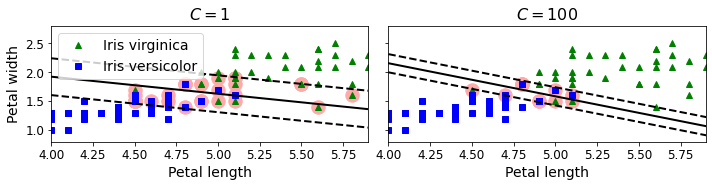

In [88]:
fig, axes = plt.subplots(ncols=2, figsize=(10,2.7), sharey=True)

plt.sca(axes[0])
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^", label="Iris virginica")
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs", label="Iris versicolor")
plot_svc_boundary(svm_clf_soft_1, 4, 5.9)
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="upper left", fontsize=14)
plt.title("$C = {}$".format(svm_clf_soft_1.C), fontsize=16)
plt.axis([4, 5.9, 0.8, 2.8])

plt.sca(axes[1])
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^")
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs")
plot_svc_boundary(svm_clf_soft_2, 4, 5.99)
plt.xlabel("Petal length", fontsize=14)
plt.title("$C = {}$".format(svm_clf_soft_2.C), fontsize=16)
plt.axis([4, 5.9, 0.8, 2.8])

save_fig("regularization_plot")

pada di gambar kiri lebih tergenaralize dengan baik tapi memiliki margin eror yang lumayan besar tapi pada gambar kanan condong data mendekati boundary yang mana jika data lebih dekat dengan boundary maka tidak akan sama dengan X_test data implementasi alias overfiting karena tidak tergenaralize dengan baik

jika sebuah svm mengalami overfiting maka seharusnya hyperparameter C di perkecil dan menjaga kestabilitas hyperline terbuka lebar dengan eror margin yang di minimalisisr agar tidak underfiting